In [7]:
import networkx as nx
import numpy as np
import json
import matplotlib.pyplot as plt

In [39]:
def createPreferenceGraph() :
    strings = ["prefers to collaborate with", "prefers to socialize with", "avoids to collaborate with",
           "avoids to socialize with", "perceives that the node ? prefers to collaborate with him", 
           "perceives that the node ? prefers to socialize with him", 
           "perceives that the node ? avoids to collaborate with him", 
           "perceives that the node ? avoids to socialize with him"]
    
    def editString(s, node1, node2) :
        if "?" in s :
            return f"node {node1} {str(node2).join(s.split('?'))}"
        else :
            return f"node {node1} {s} node {node2}"

    G = nx.DiGraph()
    G.add_nodes_from(range(50))
    for node in G.nodes() :
        nodes = list(filter(lambda item : item != node, G.nodes()))
        neighbors = np.random.choice(nodes, 8, replace=False)
        weights = np.random.choice(strings, 8, replace=False)
        for i,j in zip(neighbors, weights) :
            G.add_edge(int(node), int(i), opinion=editString(j, node, i))

    return G
        

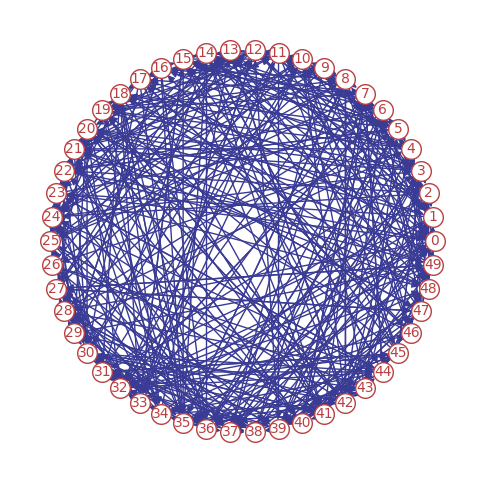

In [40]:
G = createPreferenceGraph()
plt.figure(figsize=(6,6))
plt.axis('equal')
options = {
            "node_color": "white",
            "edgecolors": "#b94042",
            "linewidths": 1,
            "node_size": 200,
            "edge_color": "#3a3b95",
            "font_size": 10,
            "font_color": '#b94042'
            }
nx.draw_circular(G, with_labels=True, **options)

In [41]:
for u, v, data in G.edges(data=True):
    print(data["opinion"])

node 0 prefers to socialize with node 17
node 0 perceives that the node 12 prefers to collaborate with him
node 0 perceives that the node 20 prefers to socialize with him
node 0 avoids to collaborate with node 23
node 0 avoids to socialize with node 28
node 0 prefers to collaborate with node 33
node 0 perceives that the node 5 avoids to socialize with him
node 0 perceives that the node 14 avoids to collaborate with him
node 1 perceives that the node 31 avoids to socialize with him
node 1 prefers to collaborate with node 36
node 1 perceives that the node 12 prefers to collaborate with him
node 1 perceives that the node 20 avoids to collaborate with him
node 1 avoids to collaborate with node 23
node 1 prefers to socialize with node 10
node 1 avoids to socialize with node 37
node 1 perceives that the node 42 prefers to socialize with him
node 2 avoids to collaborate with node 9
node 2 perceives that the node 1 prefers to collaborate with him
node 2 perceives that the node 24 prefers to so

In [42]:
def saveGraphJson(G, path) :
    def convertToJSON(G) :
        nodes = [{"id": node} for node in G.nodes()]
        
        edges = [{
            "source": i,
            "target": j,
            "comment": data["opinion"]
        } for i, j, data in G.edges(data=True)]

        return {
            "nodes": nodes,
            "edges": edges
        }
    with open(path, "w") as write_file:
        json.dump(convertToJSON(G), write_file)


In [43]:
saveGraphJson(G, "./preferenceGraph.json")

In [44]:
import re

In [45]:
def info(G) :
    counts = [0]*8
    invalid = 0

    for i, j, data in G.edges(data=True) :
        if re.match(r".*perceives.*prefers.*collaborate.*", data["opinion"]) :
            counts[4] += 1
        elif re.match(r".*perceives.*prefers.*socialize.*", data["opinion"]) :
            counts[5] += 1
        elif re.match(r".*perceives.*avoids.*collaborate.*", data["opinion"]) :
            counts[6] += 1
        elif re.match(r".*perceives.*avoids.*socialize.*", data["opinion"]) :
            counts[7] += 1
        elif re.match(r".*prefers.*collaborate.*", data["opinion"]) :
            counts[0] += 1
        elif re.match(r".*prefers.*socialize.*", data["opinion"]) :
            counts[1] += 1
        elif re.match(r".*avoids.*collaborate.*", data["opinion"]) :
            counts[2] += 1
        elif re.match(r".*avoids.*socialize.*", data["opinion"]) :
            counts[3] += 1
        else :
            invalid += 1

    assert invalid == 0, "Invalid Attribute String != 0"

    labels = ["Name the members of your team\nyou mostly hang out with",
          "Name the members of your team\nyou less hang out with",
          "Name the members of your team that\nyou think they prefer to hang out with you",
          "Name the members of your team that\nyou think they do not prefer to hang out with you"]

    values = [sum(counts[i:i+2]) for i in range(0, 8, 2)]
    plt.bar(labels, values)
    plt.xticks(rotation=90)
    plt.show()
    

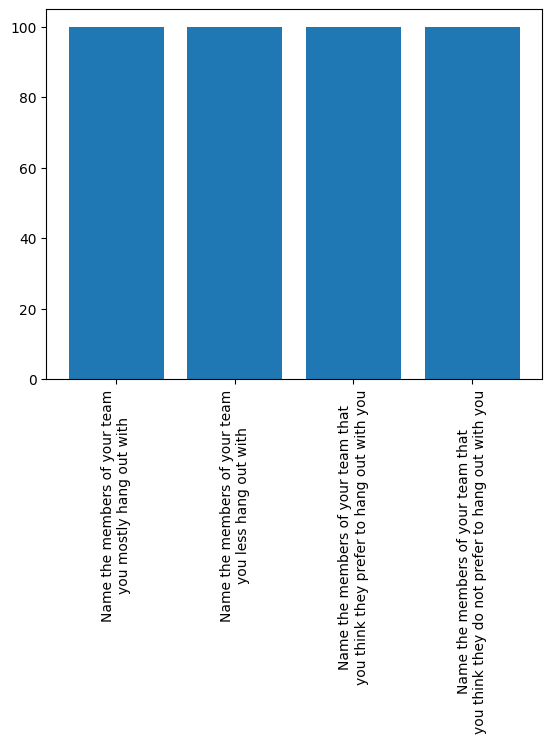

In [46]:
info(G)